In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import losses, metrics, optimizers
from sklearn.metrics import classification_report


In [9]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [10]:
# Завантажимо датасет

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
# Спробуємо декілька конфігурацій згорткової нейронну мережу (НМ).
# На вході першої НМ розташуємо згортковий шар з 32 фільтрами та MaxPooling шар.
# Таким чином ми отримаємо вихідний тензор 13, 13, 32.

model1 = Sequential(name="model_1")
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation="relu", kernel_initializer='he_uniform'))
model1.add(Dense(10, activation="softmax"))

model1.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

model1.summary()


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Додамо ще шари Conv2D з 64 фільтрами та MaxPooling.

model2 = Sequential(name="model_2")
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation="relu", kernel_initializer='he_uniform'))
model2.add(Dense(10, activation="softmax"))

model2.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

model2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# І ще один шар Conv2D і отримаємо вихідний тензор розмірності 3, 3, 64

model3 = Sequential(name="model_3")
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model3.add(Flatten())
model3.add(Dense(100, activation="relu", kernel_initializer='he_uniform'))
model3.add(Dense(10, activation="softmax"))

model3.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

model3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        57,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,454 (447.09 KB)

 Trainable params: 114,454 (447.09 KB)

 Non-trainable params: 0 (0.00 B)

Model: model_1


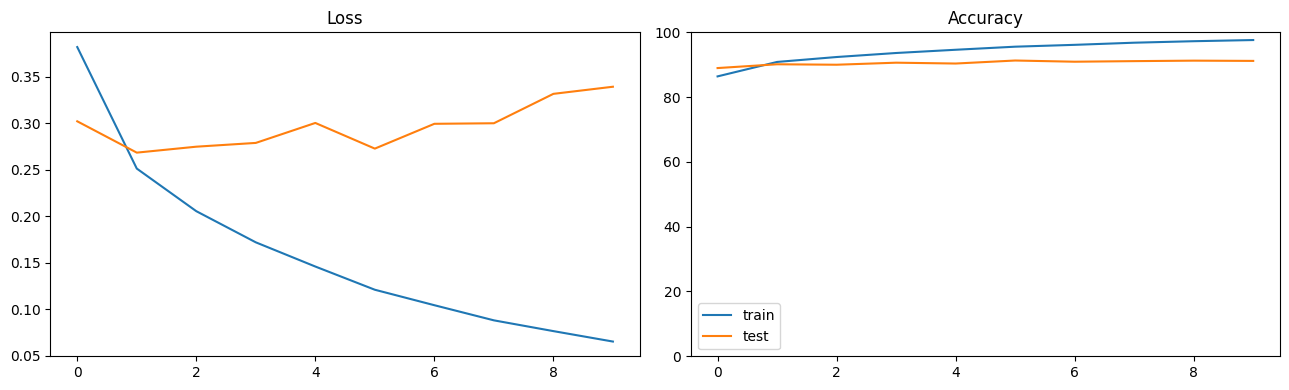

Model: model_2


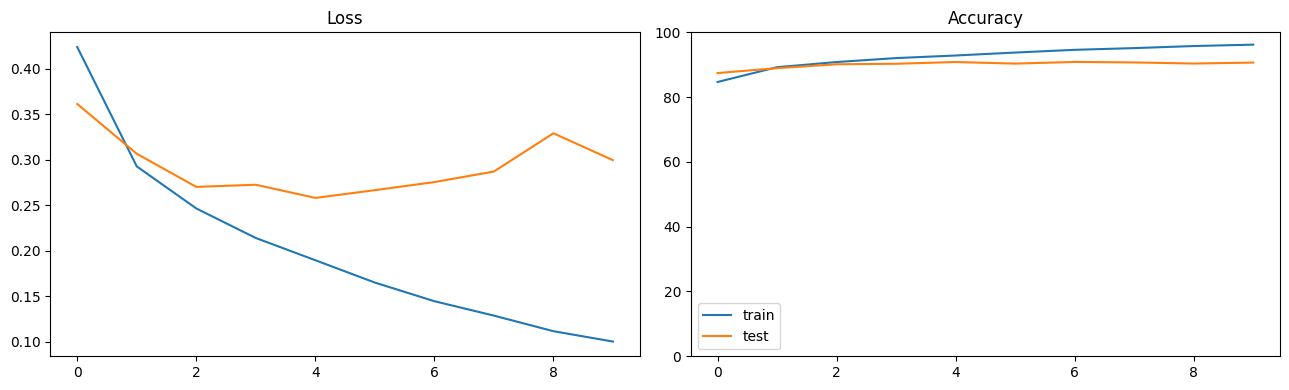

Model: model_3


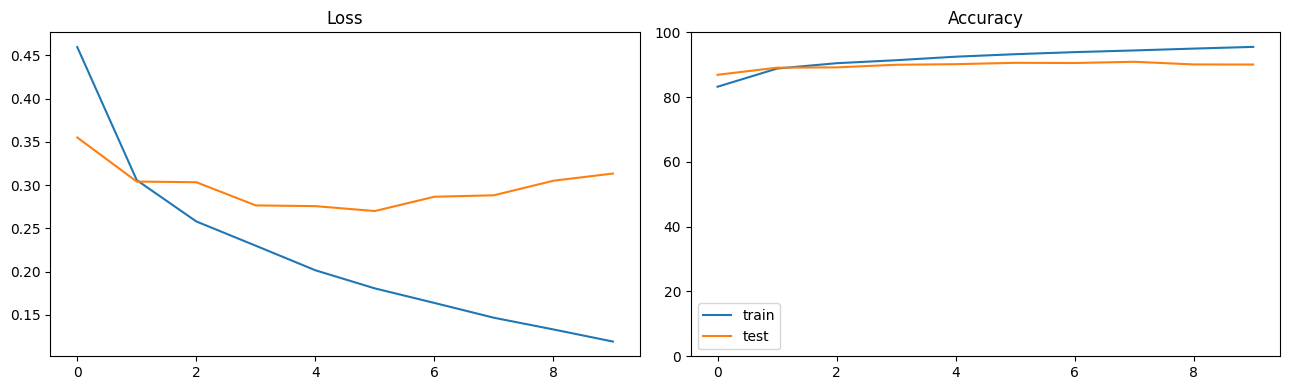

,0,1,2,3,4,5,6,7,8,9
Model: model_1,0.889700,0.901400,0.900000,0.906300,0.903700,0.913000,0.909300,0.911100,0.912600,0.911800
Model: model_2,0.874300,0.889400,0.901400,0.903000,0.908300,0.903500,0.908600,0.907100,0.903700,0.906600
Model: model_3,0.868900,0.890900,0.891800,0.899900,0.901700,0.905900,0.905300,0.909100,0.900900,0.900600


In [14]:
histories = {}

for model in [model1, model2, model3]:
    print(f"Model: {model.name}")
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    histories[f"Model: {model.name}"] = history.history["val_sparse_categorical_accuracy"]

pd.DataFrame(histories).T.style.background_gradient(cmap='viridis')

In [15]:
# Як бачимо найкращою конфігурацією виявилась НМ model_1, що забезпечила точність
# на рівні 0,91 для тестового датасету, що значно краще звичайних НМ,
# що використовувались у попередньому завданні — точність в яких не піднімалась
# вище 0,88 — 0,89 на тестовому датасеті.

print("Classification_report for train dataset")
print(
    classification_report(
        y_train,
        tf.argmax(model1.predict(x_train), axis=1)
    )
)
print("\nClassification_report for test dataset")
print(
    classification_report(
        y_test,
        tf.argmax(model1.predict(x_test), axis=1)
    )
)

Classification_report for train dataset
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6000
           1       1.00      1.00      1.00      6000
           2       0.94      0.98      0.96      6000
           3       0.99      0.99      0.99      6000
           4       0.98      0.95      0.97      6000
           5       1.00      1.00      1.00      6000
           6       0.95      0.95      0.95      6000
           7       1.00      0.98      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.98      1.00      0.99      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000


Classification_report for test dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.8